In [77]:
#Allows pictures to be included in Jupyter notebook
from IPython.core.display import Image

# Naive Bayesian (Bayes) Classifier

Bayesian Probability Theory is a field of statistics that has to do with conditional inference. Like many other classification models, the Naive Bayes model depends upon referencing a training dataset. However, unlike the KNN-Classifier and others, the Bayesian probability model relies on designating probabilities to all possible outcomes, assuming all features are independent (Naive) and abide by a certain distribution (usually a normal distribution). That is, each possible class is considered with a non-zero probability.

## Understanding Bayesian Probability

Though the math behind Bayesian probability can sometimtes be daunting, understanding its greater meaning is relatively simple. In fact, most of us use Bayesian probability every day and do not know it. Let's look at what Bayesian probability formulae look like. **Baye's Theorem** looks like this.

\begin{align}
P(A \mid B) = \frac{P(B \cap A)}{P(B)}
\end{align}

Where...

\begin{align}
P(B \cap A) = {P(B \mid A) \, P(A)}
\end{align}

All this says is that the probability of **A** happening, given that **B** happens, is equal to the probability **they both happen** divided by the odds of **B** happening. So given our example data below, we know that the **P(Go outside | Rain)** is...

We know that ...

\begin{align}
P(R \cap G) = 0.3
\end{align}
\begin{align}
P(R) = 0.5
\end{align}


So we can then plug in to find that:

\begin{align}
P(G \mid R) = \frac{P(R \cap G)}{P(R)} = \frac{0.1}{0.5} = 0.2
\end{align}

That is really all there is to it! By figuring out the odds of something, given something else is already happening, we can get a good idea of what class each item belongs to.

For example, say there are two islands: on one, the **average height of males and females is 7 feet tall** (woah). On the other, the **average height is 5 feet tall**. 

You are given someone's height, and asked to determine what island they are from using the information above. This person **is 6' 9''**. What island do you think they probably belong to? This is exactly how a Bayesian probability model works. Further along we will introduce some additional formulas, but **Baye's Theorem is by far the most important**.

### Step 1: Import Dependencies and Organize Data

As always, let's start with importing all of our dependencies. We intend to build this model from scratch, so the only modules we will use pertain to our random number generator and math-related functions. Sklearn is incorporated purely to import our sample dataset, which could just as easily have been done by importing a CSV file.

In [54]:
#Import all dependencies
from sklearn import datasets
import random
import pandas as pd 
from numpy import mean, std, exp, pi, sqrt

With our dependencies now included, let's take a look at our data. As shown below, the dataset we will be using pertains to flowers. The flowers to either the **setosa, versicolor, or virginica** species. This dataset is simple to understand and was chosen as such; the math behind the NB-Classifier is more involved than with the KNN-Classifier. Also, the 

In [55]:
#Import dictionary of all data attributes
data = datasets.load_iris()

#Shows description of data
print(data.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [56]:
#Data features
iris_data = list(data.data)

#Data Labels
iris_label = list(data.target)

print("Data Features")
print(pd.DataFrame(iris_data[:5]))

print()

print("Data Labels")
print(pd.DataFrame(iris_label[:5]))

Data Features
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

Data Labels
   0
0  0
1  0
2  0
3  0
4  0


As seen in the data printed above, each of the four features exists as a float value, while the labels are represented with integers as proxies. The dictionary conversion of these values is shown below.

In [57]:
target_dict = {0:'setosa',1:'versicolor',2:'virginica'}

So, with this new information, we know that above we are looking at five setosa flowers and their measurements. The description above mentions that there is no corrupt or missing data in this dataset, so we can now move forward to the next step.

### Step 2: Preparing Training Data for Prediction

Now that we have our dataset, lets separate it into training and testing samples. We will also need to manipulate the format of this data so we can use it for prediction later.

#### Split Training and Testing Data

In [58]:
"""
Splits data into a training and testing set. A random sample of the test_set size is set
by the test_ratio. The first input takes the entire dataset, excluding labels, the second input
takes a columns of class labels, and the third input gives a test ratio.
The first output is a tuple list of train data and train labels, the last two are the data and labels
of the testing sample.
"""
def train_test_split(data,label,test_ratio):
    train_data = []
    test_data = []
    test_label = []

    test_set_num = int(round(test_ratio*len(data),0))
    test_records = random.sample(range(len(data)), test_set_num)

    for i in range(len(data)):
        if i in test_records:
            test_data.append(data[i])
            test_label.append(label[i])
        else:
            train_record = (data[i],label[i])
            train_data.append(train_record)

    return train_data, test_data, test_label

"""
Separates records in the training dataset by class (label). This takes an input of a
training dataset and outputs a dictionary of records by class.
"""
def classSep(train_data):
    classDict = {}
    for i in range(len(train_data)):
        if train_data[i][1] not in classDict:
            classDict[train_data[i][1]] = []
        classDict[train_data[i][1]].append(train_data[i][0])

    return classDict

First, we use a random number generator to give us a testing and training sample. The generator gives us a list of indices, corresponding to different records in our dataset. 

Next, our training data is separated by class in a dictionary format. All records that are setosas are put in one category, and so on. The final result for the testing set looks like this. **We will use 25% of our data as our testing set**

In [59]:
#Splits data into a train and testing set
train_set, test_data, test_label = train_test_split(iris_data,iris_label,0.25)

#Separates records class
sepByClass = classSep(train_set)

print(sepByClass)

{0: [array([ 5.1,  3.5,  1.4,  0.2]), array([ 4.9,  3. ,  1.4,  0.2]), array([ 4.6,  3.1,  1.5,  0.2]), array([ 5. ,  3.6,  1.4,  0.2]), array([ 5.4,  3.9,  1.7,  0.4]), array([ 4.6,  3.4,  1.4,  0.3]), array([ 5. ,  3.4,  1.5,  0.2]), array([ 4.4,  2.9,  1.4,  0.2]), array([ 5.4,  3.7,  1.5,  0.2]), array([ 4.8,  3.4,  1.6,  0.2]), array([ 4.8,  3. ,  1.4,  0.1]), array([ 4.3,  3. ,  1.1,  0.1]), array([ 5.4,  3.9,  1.3,  0.4]), array([ 5.1,  3.5,  1.4,  0.3]), array([ 5.7,  3.8,  1.7,  0.3]), array([ 5.1,  3.7,  1.5,  0.4]), array([ 4.6,  3.6,  1. ,  0.2]), array([ 5.1,  3.3,  1.7,  0.5]), array([ 4.8,  3.4,  1.9,  0.2]), array([ 5.2,  3.5,  1.5,  0.2]), array([ 4.8,  3.1,  1.6,  0.2]), array([ 5.4,  3.4,  1.5,  0.4]), array([ 4.9,  3.1,  1.5,  0.1]), array([ 5. ,  3.2,  1.2,  0.2]), array([ 5.5,  3.5,  1.3,  0.2]), array([ 4.9,  3.1,  1.5,  0.1]), array([ 4.4,  3. ,  1.3,  0.2]), array([ 5.1,  3.4,  1.5,  0.2]), array([ 5. ,  3.5,  1.3,  0.3]), array([ 4.5,  2.3,  1.3,  0.3]), array

I know the data above is an eyesore, but note how the first number is a **0 followed by a list of data values**. The structure of the dictionary is **{label_key1: {data} , label_key2: {data} , label_key3: {data}}**

#### Generate Summary Statistics

Ok, now let's clean up that nasty looking array we see above into something we can work with. The most important things for a Bayesian model are to have a good disctribution of data for each class so that we can get the mean and standard deviation of the data. **The mean and standard deviation for each feature is all we need to complete our model**. However, these statistics need to be separated out by class.

Before we do this, though, let's figure our why it is important. A normal distribution, as seen below, can be calculated with the mean and standard deviation of something. **The mean is the center, the standard deviation is how wide the curve is**.

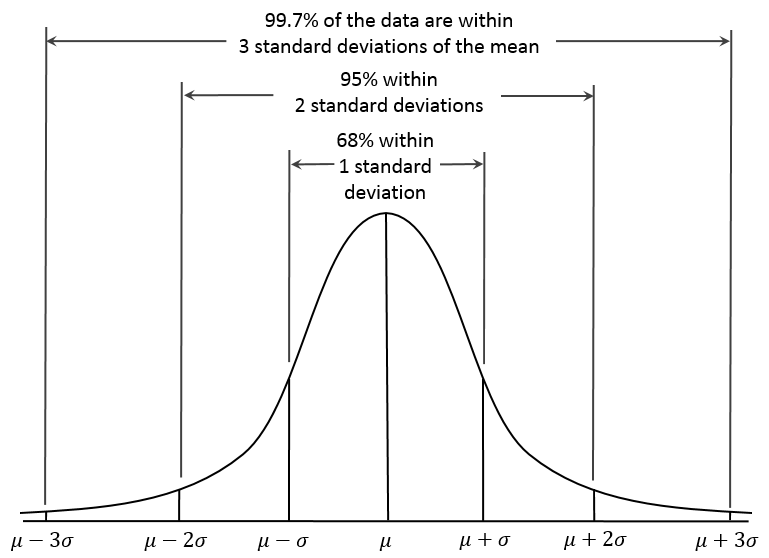

In [79]:
Image(filename=('/Users/Sam/Documents/Python/Pictures/Bayes/Bayes1.png'))

We already know how to get the mean and standard deviation of something, so we will gloss over that math and go straight to the coding.

In [75]:
"""
Creates a dictionary of the mean and standard deviation of every feature for each class. This takes a dictionary
of separated training data, and outputs a dictionary of summary statistics (mean and stdev). For a dataset with three 
classes and four features, there would be a total of 3x4 = 12 means and stdevs, separated by class.
"""
def classStats(train_classDict):
    classStats = {}
    for i in train_classDict:
        if i not in classStats:
            classStats[i] = []
        classStats[i] = [(mean(j), std(j))for j in zip(*train_classDict[i])]

    return classStats

After we run our training data dictionary through this function, we get an output dictionary that looks like this...

In [74]:
#Get summary statistics for each feature
classStats = classStats(sepByClass)

#DataFrame of the summary stats of the setosa class (mean, stdev)
print(pd.DataFrame(list(classStats[0])))

          0         1
0  4.945946  0.334983
1  3.348649  0.324347
2  1.454054  0.182467
3  0.251351  0.110580


And there we go. **For each class, the mean and standard deviation of each feature has been calculated and stored**. We are now ready to being the predicting.

### Step 3: Predicting for the Testing Data

Now that we have the information we need from the testing data, let's get ready to begin predicting our testing data. For each testing record, we will calculate the Bayesian probability that record belongs to a given class. We will store this in s dictionary in the format **[(class1, probclass1), (class2, probclass2) ... ]**. First, however, we need to understand how we will gather these probablities.

Baye's Theorem, though only used for single events in our first example, **can also be used for data with multiple contributing factors**. For example, the probability of going outside is impacted by the weather (rain), if you are injured, if you have homework, the time of day, what your friends are doing, and a million other things. To account for this kind of input, Baye's Theorem can take a new form. A conditional probability can be re-written as...

\begin{align}
P(A \mid B) = P(b_1 \mid A) * P(b_2 \mid A) * P(b_3 \mid A) ... P(b_n \mid A) * P(A)
\end{align}

In other words, the **true conditional probability of A given B is the product of the probability of all contributing sub-factors of B, given something else (in this case, A) is happening, multiplied by the odds A actually happens**. This can be seen to be:

\begin{align}
P(A \mid B) = P(A) * \prod_{i=1}^{n}P(b_i \mid A)
\end{align}

So, how can we get each individual probability then? Well, we can use what is called a **probability density function**. This is essentially a **normal curve**, just like the one we saw above. To get the probability we need from this distribution, we can **plug our mean, standard deviation, and mystery feature value into the following formula**. The closer the mystery value is to the mean of the distribution, the higher probability it belongs.

\begin{align}
f(x \mid \mu, \sigma) = \frac{1}{\sqrt{2\pi}{\sigma}}\mathrm{e}^{{-\frac{(x - \mu)^2}{2\sigma^2}}}
\end{align}

The reason this function does not explicitly state it give probabilities is that it will **return values that are greater than one**. For our purposes, this is not important, so we will move on to actually using this function to predict. 

In [63]:
"""
Returns the probability of a feature given this attribute follows a normal (Gaussian) Distribution
with the provided mean and standard deviation.
"""
def gaussProb(mean,stddev,feature):
    num = exp(-((feature - mean)**2) / (2*(stddev**2)))
    den = stddev*sqrt(2*pi)

    if den == 0: return 0

    return num / den

"""
Gathers the probability each record belongs to each class. This information is submitted as a list
of tuples, one for each class, in the format (class, probability). The probability itself is more of an estimate,
as it ignores the probability of the class. It also takes in the summary statistics dictionary 
of the training data, as well as the testing data to determine the probability a testing 
record belongs to each class. probDist determines what probability engine is used for the records.
"""
def probsByClass(classStats, test_data, probDist = gaussProb):
    finalProbList = []

    for i in range(len(test_data)):
        tempProbList = []
        for j in classStats:
            classProb = 1
            for k in range(len(test_data[i])):
                classProb *= probDist(classStats[j][k][0],classStats[j][k][1],test_data[i][k])

            tempProbList.append((j,classProb))

        finalProbList.append(tempProbList)

    return finalProbList

In [64]:
finalProbsList = probsByClass(classStats, test_data)

#Shows the probability of each record belonging to different classes
print(pd.DataFrame(finalProbsList[:5]))

                       0                       1                       2
0     (0, 4.99423698296)  (1, 2.33155079224e-17)  (2, 5.99941686211e-25)
1     (0, 3.23953517327)  (1, 8.73266079723e-17)  (2, 1.50235580627e-24)
2   (0, 0.0203115834614)   (1, 1.1300194082e-19)  (2, 6.27675332261e-26)
3  (0, 0.00188243300303)  (1, 2.49570741139e-18)  (2, 4.31083432297e-24)
4     (0, 3.47157072771)  (1, 2.34891835379e-16)  (2, 2.85135644461e-23)


As you can tell by looking at these first few samples, the mystery records look to all be setosa flowers. We will verify this below with our final predictions and data visualization.

### Step 4: Saving Predictions and Visualizing Results

Now that we have all of the probabilities we need, we can save these results and visualize how well our model did.
The prediction function is actually very simple. For each record, all it does is identify what class had the highest probability and save it to a predicted_answer list. The remaining two functions are the exact same as the KNN-Classifier visualization and give us a good way to identify which model is performing better.

In [65]:
"""
The function is the final step of the prediction process. The probabilities list found in the previous step 
are now ranked, and the highest probability class for each record is saved to a predictions list.
"""
def predict(finalProbList):
    predictions = []

    for i in range(len(finalProbList)):
        bestClass = -1
        bestProb = 0

        for j in range(len(finalProbList[i])):
            if bestProb < finalProbList[i][j][1]:
                bestClass = finalProbList[i][j][0]
                bestProb = finalProbList[i][j][1]

        predictions.append(bestClass)

    return predictions

"""
This function visualizes the results of the model. Inputs include a column of the actual labels, and
the predicted labels. It outputs a dataframe with all the results and whether or not they were correct.
"""
def getResults(actual, predicted):
    result = pd.DataFrame()
    for i in range(len(actual)):
        predicted[i] = target_dict[predicted[i]]
        actual[i] = target_dict[actual[i]]

    result['ACTUAL'] = actual
    result['PREDICTED'] = predicted
    result['CORRECT?'] = [actual[i] == predicted[i] for i in range(len(actual))]

    return result

"""
Prints the accuracy of the dataframe. Takes a column of actual labels v. predicted labels. It gives
the accuracy, the number of cases correctly predicted, and the number of cases incorrectly predicted.
"""
def getAccuracy(actual, predicted):
    total_cases = len(actual)
    num_correct = 0
    num_incorrect = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            num_correct += 1
        else:
            num_incorrect += 1

    accuracy = (num_correct / total_cases)*100

    return "Accuracy: {0}%\nNumber correct: {1}\nNumber incorrect: {2}".format(str(accuracy),str(num_correct),str(num_incorrect))

### Step 5: Running the Model Against Our Data

Finally, we can consolidate all of these functions into a **main method**, as seen below. This will give us a quick way to call up our function with certain inputs and get our results without having to call all of our sub-functions. ***This step is unnecessary**; you could just run each step on its own. However, generally speaking this is bad practice for software development.

In [70]:
"""
Runs the entire script for the Iris dataset.
"""
def main(data,labels,train_test_split_ratio):
    iris_train, test_data, test_labels = train_test_split(data, labels, train_test_split_ratio)
    classSepDict = classSep(iris_train)
    classStatDict = classStats(classSepDict)
    finalProbs = probsByClass(classStatDict, test_data)
    preds = predict(finalProbs)
    results = getResults(test_labels,preds)
    accuracy = getAccuracy(test_labels,preds)

    print(results)
    print()
    print(accuracy)

We are ready to go. Now we can run all of our code using just the **main method and our three inputs**: data, labels, and our train_test split ratio.

In [76]:
#Execute Script
main(iris_data,iris_label,0.25)

        ACTUAL   PREDICTED CORRECT?
0       setosa      setosa     True
1       setosa      setosa     True
2       setosa      setosa     True
3       setosa      setosa     True
4       setosa      setosa     True
5       setosa      setosa     True
6       setosa      setosa     True
7       setosa      setosa     True
8       setosa      setosa     True
9       setosa      setosa     True
10      setosa      setosa     True
11      setosa      setosa     True
12      setosa      setosa     True
13      setosa      setosa     True
14      setosa      setosa     True
15      setosa      setosa     True
16      setosa      setosa     True
17  versicolor  versicolor     True
18  versicolor  versicolor     True
19  versicolor  versicolor     True
20  versicolor  versicolor     True
21  versicolor  versicolor     True
22  versicolor  versicolor     True
23  versicolor  versicolor     True
24  versicolor  versicolor     True
25  versicolor  versicolor     True
26  versicolor  versicolor  

This model appears to be **very accurate** in determining flower types. In fact, this model commonly outperforms more complicated ones, though it relies heavily on the assumption that all features are independent of one another. 

#### Future Exploration

There are many other ways to make a Bayesian algorithm. For example, you could try to optimize it for different data sets using different probability distributions (Multnomial, poisson, etc.). Have fun with this, and please commit it so all of us can see!